# CV evaluation with lasso regression on RA & PD datasets (within each dataset separately)

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import Pool
import warnings
import microscope as mc
import pickle

from sklearn.metrics import classification_report

sns.set_style("white")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
base_d = "/Users/erankotler/dinamo"
data_d = os.path.join(base_d, "data/gse_data_20231002")

results_d = os.path.join(base_d, "resutls")
models_d = os.path.join(base_d, "models")


In [3]:
[d for d in os.listdir(data_d) if d.startswith("GSE")]

['GSE145361',
 'GSE111223',
 'GSE190348',
 'GSE42861',
 'GSE111942',
 'GSE87095',
 'GSE147221',
 'GSE175364',
 'GSE111629',
 'GSE121192']

In [4]:
# gse_acc = "GSE111223" # PD ~260 samps
# gse_acc = "GSE111629" # PD ~570 samps
# gse_acc = "GSE145361" # PD, ~1800 samps

PD_datasets = ["GSE145361","GSE111629", "GSE190348", "GSE111223"]
RA_datasets = ["GSE42861","GSE111942","GSE121192","GSE87095"] # "GSE175364" is a 78-patient dataset for prediction of  undifferentiated arthritis (UA)=>RA progression with only 6 controls

In [5]:
%%time
datasets_to_analyze = RA_datasets #PD_datasets # RA_datasets
RA_CV_results_l1 = {}

for gse_acc in datasets_to_analyze:
    print("Processing", gse_acc)
    gse_d = os.path.join(data_d, gse_acc)
    data = mc.Dataset(gse_d=gse_d)
    data.load_data() 
    # data.load_data(max_CpGs=50000)#, max_samps=200) # For debugging
    data.organize_data()
    
    # Examine original label names
    print("Original labels:", data.orig_label_names)
    print("Number of samples:", data.df.shape[0])
    
    cv_res = mc.cv_train_test(
        data, 
        CV = 10, # "LOO" # 10 #"LOO"
        penalty = 'l1', 
        internalCV_folds = 3,
        nan_policy="impute_by_median",
        feat_selection='wilcox',
        feat_selection_pval_thresh=0.05)

    RA_CV_results_l1[gse_acc] = cv_res
    
    # save results to disk
    out_f = os.path.join(results_d, gse_acc + "_l1_cv_res_v0.dat")
    pickle.dump(cv_res, open(out_f, 'wb'))
    print ("CV results saved to", out_f)
    print("***************************************************************************\n")

Processing GSE42861
Target label counts (0/1): 335 / 354
Original labels: ['control' 'case']
Number of samples: 689
Starting cross validation
Starting fold 0 - Train-test splitting
CV fold 0 Train size: 620, test size: 69 (fract positives in train: 0.518)
Imputing missing values, elapsed time: 0.7 sec
Starting feature selection, elapsed time: 5.8 sec
Selecting features using wilcoxon
Retained 188275 features
Feature selection complete, ready for training, elapsed time: 73.1 sec
Fold complete, fold time: 113.2 sec
Starting fold 1 - Train-test splitting
CV fold 1 Train size: 620, test size: 69 (fract positives in train: 0.523)
Imputing missing values, elapsed time: 0.9 sec
Starting feature selection, elapsed time: 6.3 sec
Selecting features using wilcoxon
Retained 197843 features
Feature selection complete, ready for training, elapsed time: 76.9 sec
Fold complete, fold time: 118.8 sec
Starting fold 2 - Train-test splitting
CV fold 2 Train size: 620, test size: 69 (fract positives in trai

In [ ]:
%%time
datasets_to_analyze = RA_datasets #PD_datasets # RA_datasets
RA_CV_results_l2 = {}

for gse_acc in datasets_to_analyze:
    print("Processing", gse_acc)
    gse_d = os.path.join(data_d, gse_acc)
    data = mc.Dataset(gse_d=gse_d)
    data.load_data() 
    # data.load_data(max_CpGs=50000, max_samps=200) # For debugging
    data.organize_data()
    
    # Examine original label names
    print("Original labels:", data.orig_label_names)
    print("Number of samples:", data.df.shape[0])
    
    cv_res = mc.cv_train_test(
        data, 
        CV = 10, # "LOO" # 10 #"LOO"
        penalty = 'l2', 
        internalCV_folds = 3,
        nan_policy="impute_by_median",
        feat_selection='wilcox',
        feat_selection_pval_thresh=0.05)

    RA_CV_results_l2[gse_acc] = cv_res
    
    # save results to disk
    out_f = os.path.join(results_d, gse_acc + "_l2_cv_res_v0.dat")
    pickle.dump(cv_res, open(out_f, 'wb'))
    print ("CV results saved to", out_f)
    print("***************************************************************************\n")

Processing GSE42861
Target label counts (0/1): 335 / 354
Original labels: ['control' 'case']
Number of samples: 689
Starting cross validation
Starting fold 0 - Train-test splitting
CV fold 0 Train size: 620, test size: 69 (fract positives in train: 0.518)
Imputing missing values, elapsed time: 1.0 sec
Starting feature selection, elapsed time: 6.3 sec
Selecting features using wilcoxon
Retained 188275 features
Feature selection complete, ready for training, elapsed time: 74.9 sec
Fold complete, fold time: 147.6 sec
Starting fold 1 - Train-test splitting
CV fold 1 Train size: 620, test size: 69 (fract positives in train: 0.523)
Imputing missing values, elapsed time: 1.0 sec
Starting feature selection, elapsed time: 6.5 sec
Selecting features using wilcoxon
Retained 197843 features
Feature selection complete, ready for training, elapsed time: 78.1 sec
Fold complete, fold time: 155.6 sec
Starting fold 2 - Train-test splitting
CV fold 2 Train size: 620, test size: 69 (fract positives in trai

In [ ]:
%%time
datasets_to_analyze = PD_datasets # RA_datasets
PD_CV_results_l1 = {}

for gse_acc in datasets_to_analyze:
    print("Processing", gse_acc)
    gse_d = os.path.join(data_d, gse_acc)
    data = mc.Dataset(gse_d=gse_d)
    # data.load_data() 
    data.load_data(max_samps=600) # For debugging max_CpGs=50000, 
    data.organize_data()
    
    # Examine original label names
    print("Original labels:", data.orig_label_names)
    print("Number of samples:", data.df.shape[0])
    
    cv_res = mc.cv_train_test(
        data, 
        CV = 10, # "LOO" # 10 #"LOO"
        penalty = 'l1', 
        internalCV_folds = 3,
        nan_policy="impute_by_median",
        feat_selection='wilcox',
        feat_selection_pval_thresh=0.05)

    PD_CV_results_l1[gse_acc] = cv_res
    
    # save results to disk
    out_f = os.path.join(results_d, gse_acc + "_l2_cv_res_v0.dat")
    pickle.dump(cv_res, open(out_f, 'wb'))
    print ("CV results saved to", out_f)
    print("***************************************************************************\n")

In [ ]:
%%time
datasets_to_analyze = PD_datasets # RA_datasets
PD_CV_results_l2 = {}

for gse_acc in datasets_to_analyze:
    print("Processing", gse_acc)
    gse_d = os.path.join(data_d, gse_acc)
    data = mc.Dataset(gse_d=gse_d)
    # data.load_data() 
    data.load_data(max_samps=600) # For debugging max_CpGs=50000, 
    data.organize_data()
    
    # Examine original label names
    print("Original labels:", data.orig_label_names)
    print("Number of samples:", data.df.shape[0])
    
    cv_res = mc.cv_train_test(
        data, 
        CV = 10, # "LOO" 
        penalty = 'l2', 
        internalCV_folds = 3,
        nan_policy="impute_by_median",
        feat_selection='wilcox',
        feat_selection_pval_thresh=0.05)

    PD_CV_results_l2[gse_acc] = cv_res
    
    # save results to disk
    out_f = os.path.join(results_d, gse_acc + "_l2_cv_res_v0.dat")
    pickle.dump(cv_res, open(out_f, 'wb'))
    print ("CV results saved to", out_f)
    print("***************************************************************************\n")

# HERE - Night 

# Models don't learn -> Debugging:

In [273]:
gse_acc = "GSE121192"
gse_d = os.path.join(data_d, gse_acc)
data = mc.Dataset(gse_d=gse_d)
data.load_data(max_CpGs=50000)#, max_samps=50) 
data.organize_data()

Target label counts (0/1): 16 / 30


In [274]:
data.y.value_counts()

1.0    30
0.0    16
Name: count, dtype: int64

In [275]:
data.df.head()

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,cg02455797,cg02455803,cg02455820,cg02455827,cg02455836,cg02455868,cg02456087,cg02456218,cg02456219,cg02456226
GSM3427639,0.489674,0.970901,0.934324,0.167923,0.807739,0.817810,0.853751,0.224321,0.345042,0.017054,...,0.833061,0.020768,0.112676,0.879540,0.983849,0.922799,0.120537,0.859151,0.057736,0.035534
GSM3427625,0.783458,NaN,NaN,NaN,NaN,NaN,0.868898,0.283165,0.417663,0.014139,...,0.878493,0.025093,0.096117,0.898236,0.984983,NaN,0.254438,NaN,0.068643,0.166669
GSM3427626,0.769447,0.972417,0.906328,0.396645,0.939122,0.789392,0.902351,0.383123,0.383661,0.015736,...,0.781869,0.027404,0.169894,0.880735,0.986625,0.952526,0.169433,0.840767,0.043526,0.178105
GSM3427644,0.581425,0.969801,0.940581,0.232248,0.740743,0.782575,0.875173,0.335452,0.432475,0.015218,...,0.806722,0.025398,0.126842,0.876903,0.987728,0.917339,0.131432,0.876083,0.052380,0.037209
GSM3427635,0.486887,0.970310,0.949697,0.207570,0.707721,0.790012,0.811613,0.209522,0.337576,0.013981,...,0.783549,0.028175,0.107436,0.879318,0.987014,0.936205,0.111144,0.932020,0.058921,0.045682


In [276]:
data.df_filt = data.df.dropna(axis=1)

In [277]:
data.df_filt.shape

(46, 32417)

In [278]:
data.X = data.df_filt.values

In [279]:
data.X.shape, data.y.shape

((46, 32417), (46,))

In [280]:
data.y.head()

GSM3427639    1.0
GSM3427625    1.0
GSM3427626    1.0
GSM3427644    1.0
GSM3427635    0.0
dtype: float64

In [281]:
data.df.head()

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,cg02455797,cg02455803,cg02455820,cg02455827,cg02455836,cg02455868,cg02456087,cg02456218,cg02456219,cg02456226
GSM3427639,0.489674,0.970901,0.934324,0.167923,0.807739,0.817810,0.853751,0.224321,0.345042,0.017054,...,0.833061,0.020768,0.112676,0.879540,0.983849,0.922799,0.120537,0.859151,0.057736,0.035534
GSM3427625,0.783458,NaN,NaN,NaN,NaN,NaN,0.868898,0.283165,0.417663,0.014139,...,0.878493,0.025093,0.096117,0.898236,0.984983,NaN,0.254438,NaN,0.068643,0.166669
GSM3427626,0.769447,0.972417,0.906328,0.396645,0.939122,0.789392,0.902351,0.383123,0.383661,0.015736,...,0.781869,0.027404,0.169894,0.880735,0.986625,0.952526,0.169433,0.840767,0.043526,0.178105
GSM3427644,0.581425,0.969801,0.940581,0.232248,0.740743,0.782575,0.875173,0.335452,0.432475,0.015218,...,0.806722,0.025398,0.126842,0.876903,0.987728,0.917339,0.131432,0.876083,0.052380,0.037209
GSM3427635,0.486887,0.970310,0.949697,0.207570,0.707721,0.790012,0.811613,0.209522,0.337576,0.013981,...,0.783549,0.028175,0.107436,0.879318,0.987014,0.936205,0.111144,0.932020,0.058921,0.045682


In [282]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, LeaveOneOut, train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [283]:
X_train, X_test, y_train, y_test = train_test_split(data.X, data.y, test_size=0.2, random_state=44)

In [284]:
X_train.shape, X_test.shape

((36, 32417), (10, 32417))

In [285]:
clf = LogisticRegressionCV(cv=3, max_iter=1000, penalty='l2')

In [286]:
clf.fit(X_train, y_train)

LogisticRegressionCV(cv=3, max_iter=1000)

In [287]:
clf.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [288]:
clf.C_

array([2.7825594])

In [289]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [290]:
y_pred_prob

array([0.91217269, 0.87903408, 0.92292885, 0.82579103, 0.95356712,
       0.939055  , 0.93522591, 0.99236006, 0.32852942, 0.94901905])

In [291]:
y_test.value_counts()

1.0    9
0.0    1
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='pred_prob'>

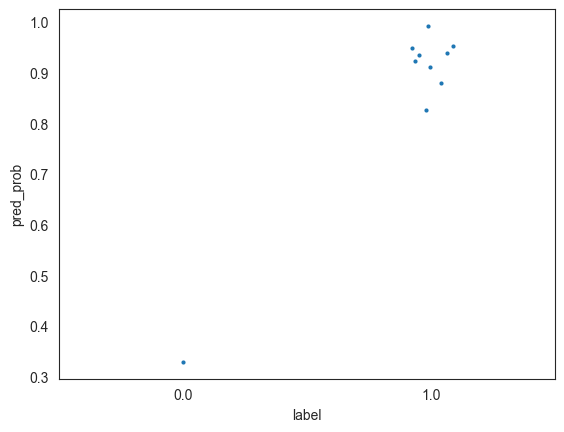

In [292]:
sns.stripplot(data=pd.DataFrame({"label":y_test, "pred_prob":y_pred_prob}),
                x="label", y="pred_prob", s=3)

In [293]:
rep = classification_report(y_test, y_pred > 0.5)
print(rep)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [294]:
cv_res = mc.cv_train_test(
        data, 
        CV = 5, # "LOO" # 10 #"LOO"
        penalty = 'l2', #None, #'l2', 
        internalCV_folds = 3,
        nan_policy="impute_by_median",
        feat_selection=None,#'wilcox',
        feat_selection_pval_thresh=0.05)

Starting cross validation
Starting fold 0 - Train-test splitting
CV fold 0 Train size: 36, test size: 10 (fract positives in train: 0.611)
Imputing missing values, elapsed time: 0.0 sec
Starting feature selection, elapsed time: 0.1 sec
Retained 34309 features
Feature selection complete, ready for training, elapsed time: 0.1 sec
LogisticRegressionCV(class_weight='balanced', cv=3, max_iter=300,
                     random_state=42)
Fold complete, fold time: 12.3 sec
Starting fold 1 - Train-test splitting
CV fold 1 Train size: 37, test size: 9 (fract positives in train: 0.676)
Imputing missing values, elapsed time: 0.0 sec
Starting feature selection, elapsed time: 0.1 sec
Retained 33388 features
Feature selection complete, ready for training, elapsed time: 0.1 sec
LogisticRegressionCV(class_weight='balanced', cv=3, max_iter=300,
                     random_state=42)
Fold complete, fold time: 12.8 sec
Starting fold 2 - Train-test splitting
CV fold 2 Train size: 37, test size: 9 (fract posi

In [370]:
def plot_cv_single_roc(cv_res, title_pfx="", out_f=None):
    y_true = [item for sublist in cv_res["y_test"] for item in sublist]
    y_probas = [item for sublist in cv_res["y_pred_prob"] for item in sublist]
    auc = roc_auc_score(flat_y_test, flat_y_pred_prob)
    fpr, tpr, thresholds = roc_curve(y_true,  y_probas)
    plt.plot(fpr,tpr, c='darkblue', label="AUC=%0.2f"%auc)
    plt.plot([0, 1], [0, 1],'k--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(title_pfx + ' Receiver operating characteristic')
    plt.legend(loc="lower right")
    if out_f is not None:
        plt.savefig(out_f)
    plt.show()

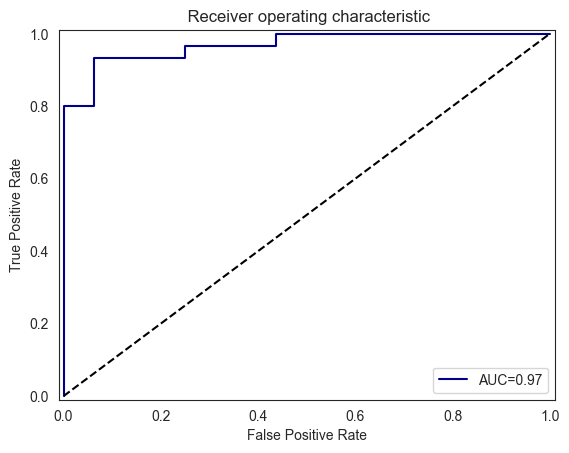

In [371]:
plot_cv_roc(cv_res)

In [375]:
for i in range(5):
    print(cv_res["y_test"][i].value_counts())

1.0    8
0.0    2
Name: count, dtype: int64
1.0    5
0.0    4
Name: count, dtype: int64
1.0    5
0.0    4
Name: count, dtype: int64
1.0    5
0.0    4
Name: count, dtype: int64
1.0    7
0.0    2
Name: count, dtype: int64


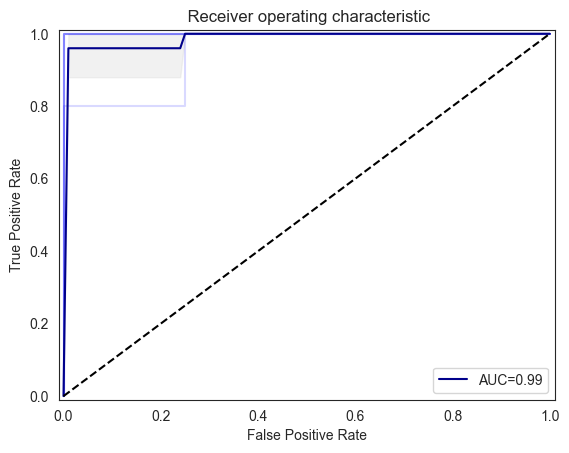

In [372]:
mc.plot_cv_roc(cv_res)

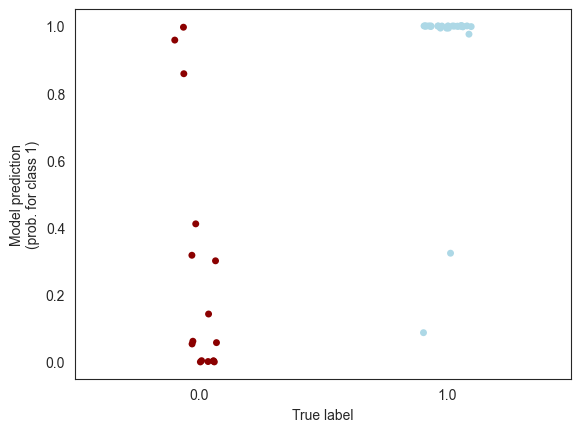

In [307]:
mc.plot_pred_prob_by_labels(cv_res)

<Axes: xlabel='label', ylabel='pred_prob'>

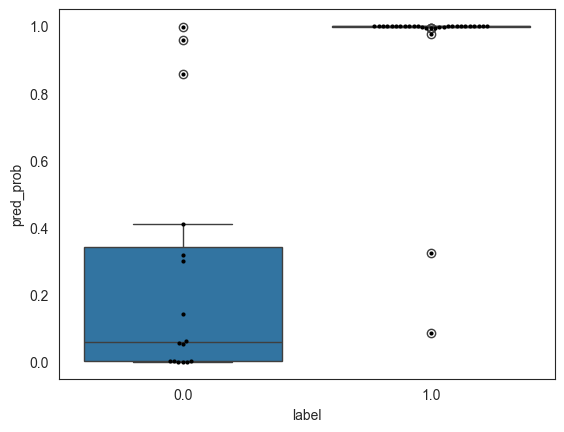

In [305]:
# flat_y_test = cv_res["y_test"][2] #
# flat_y_pred_prob = cv_res["y_pred_prob"][2] # 
flat_y_test = [item for sublist in cv_res["y_test"] for item in sublist]
flat_y_pred_prob = [item for sublist in cv_res["y_pred_prob"] for item in sublist]
sns.boxplot(data=pd.DataFrame({"label":flat_y_test, "pred_prob":flat_y_pred_prob}), x="label", y="pred_prob")
sns.swarmplot(data=pd.DataFrame({"label":flat_y_test, "pred_prob":flat_y_pred_prob}), x="label", y="pred_prob", s=3, color="k")

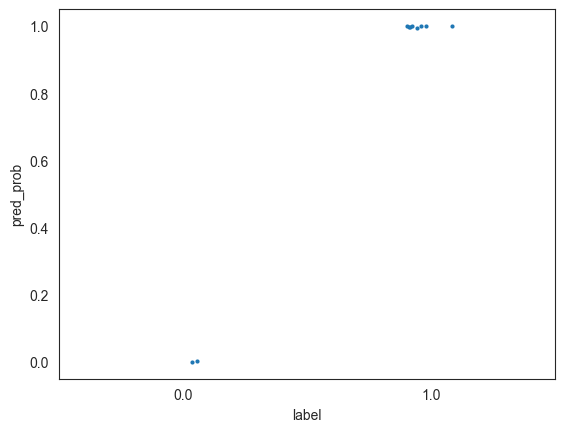

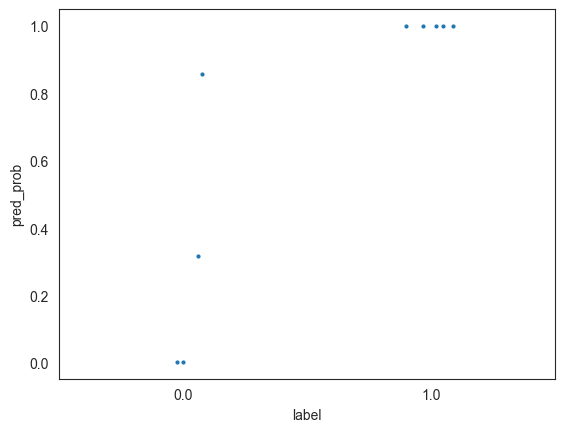

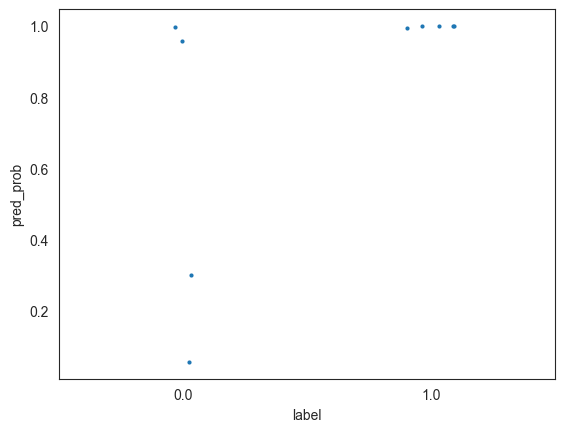

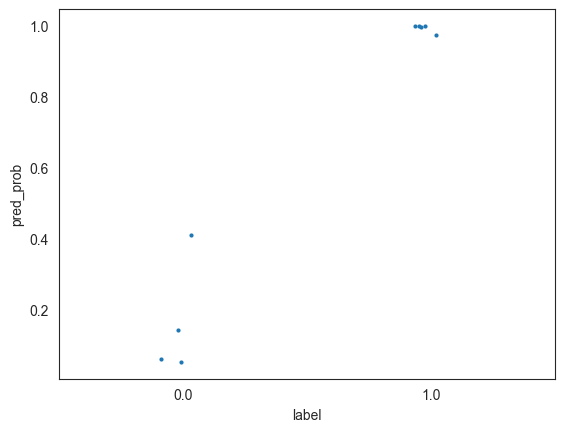

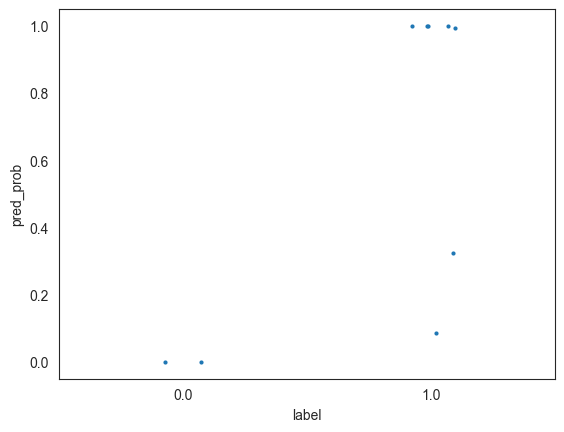

In [297]:
for i in range(5):
    flat_y_test = cv_res["y_test"][i]
    flat_y_pred_prob = cv_res["y_pred_prob"][i] 
    sns.stripplot(data=pd.DataFrame({"label":flat_y_test, "pred_prob":flat_y_pred_prob}), x="label", y="pred_prob", s=3)
    plt.show()

<Axes: xlabel='label', ylabel='pred_prob'>

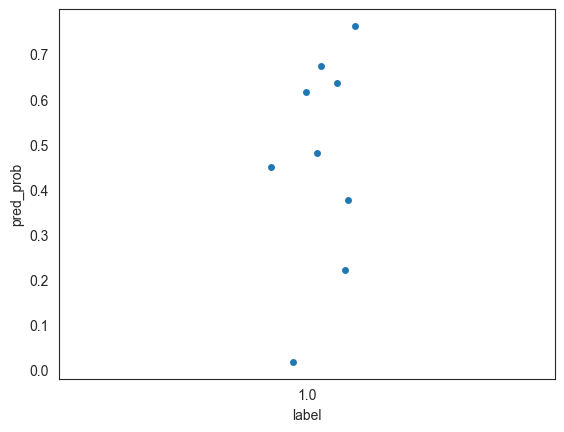

In [174]:
sns.stripplot(data=pd.DataFrame({"label":flat_y_test, "pred_prob":flat_y_pred_prob}),
            x="label", y="pred_prob")

In [33]:
flat_y_pred_prob

array([0.99999879, 0.99999828, 0.9999986 , 0.99999828, 0.99999893,
       0.99999901, 0.99999913, 0.99999918, 0.99999909, 0.99999926])

In [186]:
scaler = StandardScaler()

In [187]:
scaler

StandardScaler()

In [189]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
scaler.transform(

In [176]:
StandardScaler().fit()

TypeError: StandardScaler.fit() missing 1 required positional argument: 'X'

In [23]:
data.df.dropna(axis=1).shape

(46, 307800)

# --- HERE ----

In [9]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
LogisticRegressionCV(

# HERE

GSE42861


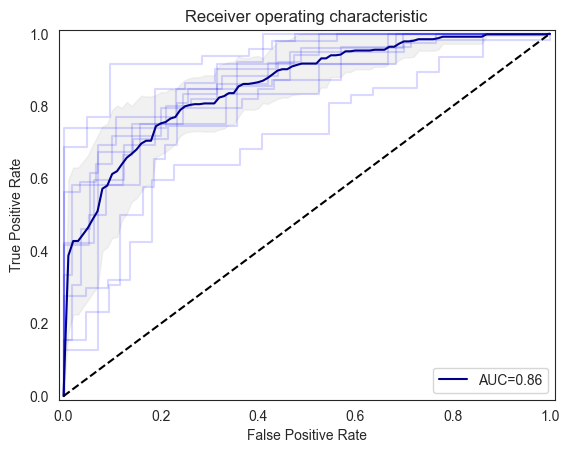

GSE111942


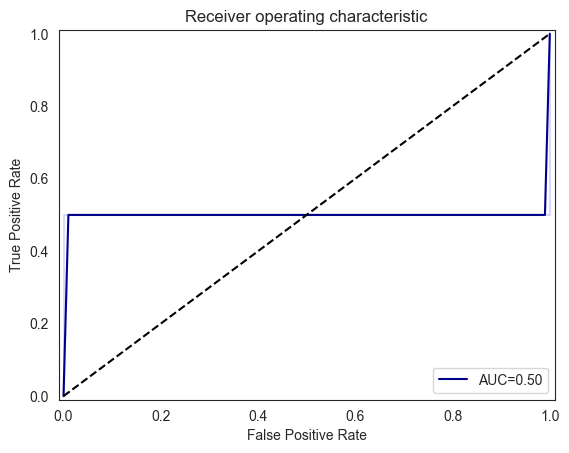

GSE121192


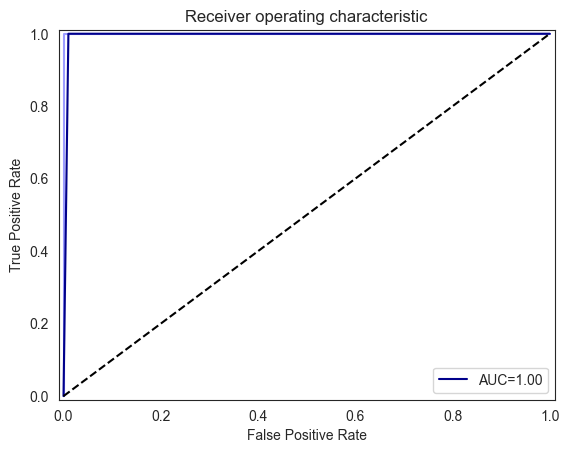

GSE87095


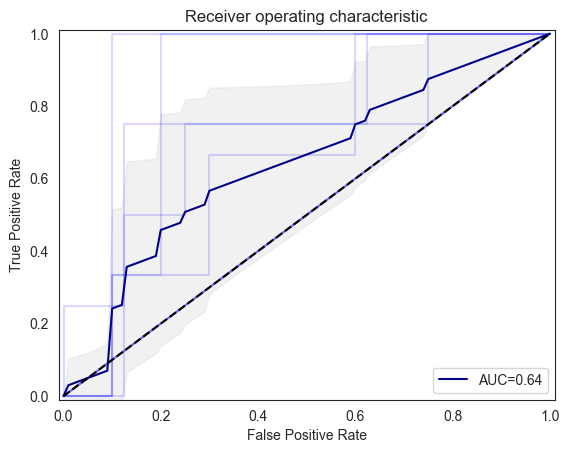

In [11]:
for gse_acc in list(CV_results.keys()):
    print(gse_acc)
    try:
        mc.plot_cv_roc(CV_results[gse_acc])
    except:
        print ("Cant plot ROC curve for %s (test sets don't include both labels)"%gse_acc)

In [19]:
gse_acc

'GSE87095'

In [12]:
cv_res = CV_results[gse_acc]

In [18]:
cv_res["y_test"][1]

GSM2322092    1.0
GSM2322093    1.0
GSM2322094    1.0
GSM2322095    0.0
GSM2322096    0.0
GSM2322097    0.0
GSM2322098    0.0
GSM2322099    0.0
GSM2322100    0.0
GSM2322101    0.0
GSM2322102    0.0
GSM2322103    0.0
GSM2322104    0.0
dtype: float64

In [15]:
cv_res["y_pred"]

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1.])

In [16]:
cv_res["y_pred_prob"][0]

array([0.2534822 , 0.24148235, 0.2573169 , 0.26326915, 0.21596101,
       0.21704715, 0.22628165, 0.22235346, 0.21506948, 0.23132825,
       0.216242  , 0.25457181, 0.22659657])

In [17]:
cv_res["y_pred_prob"][1]

array([0.40352745, 0.38680579, 0.39223488, 0.37415775, 0.39645425,
       0.37408837, 0.39134626, 0.39897965, 0.39220925, 0.38663068,
       0.38729003, 0.40928799, 0.38141349])

In [22]:
cv_res["y_pred_prob"][4]

array([0.3875354 , 0.3539134 , 0.35792006, 0.36804666, 0.36722978,
       0.35414236, 0.33045075, 0.37651684, 0.39865345, 0.3418309 ,
       0.36186688, 0.38738753])

In [23]:
cv_res["trained_models"][0]

LogisticRegressionCV(Cs=array([1.00000000e-04, 1.29154967e-03, 1.66810054e-02, 2.15443469e-01,
       2.78255940e+00, 3.59381366e+01, 4.64158883e+02, 5.99484250e+03,
       7.74263683e+04, 1.00000000e+06]),
                     cv=5, n_jobs=-1, penalty='l1', random_state=42,
                     solver='liblinear')

In [30]:
cv_res["trained_models"][1].C_

array([0.21544347])

GSE42861


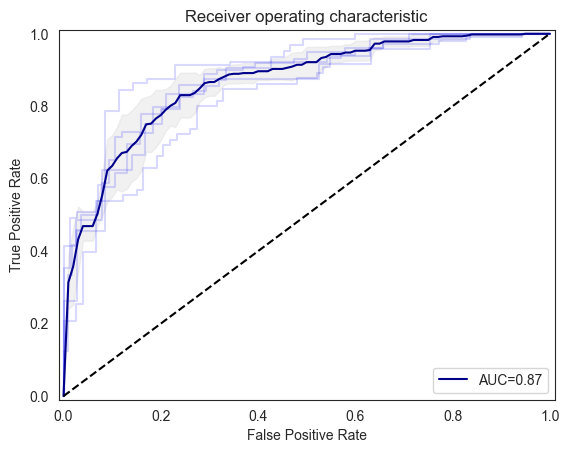

GSE111942
Cant plot ROC curve for GSE111942 (test sets don't include both labels)
GSE121192
Cant plot ROC curve for GSE121192 (test sets don't include both labels)
GSE87095


<Figure size 640x480 with 0 Axes>

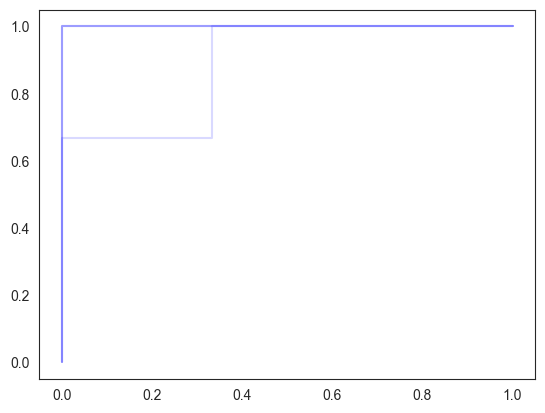

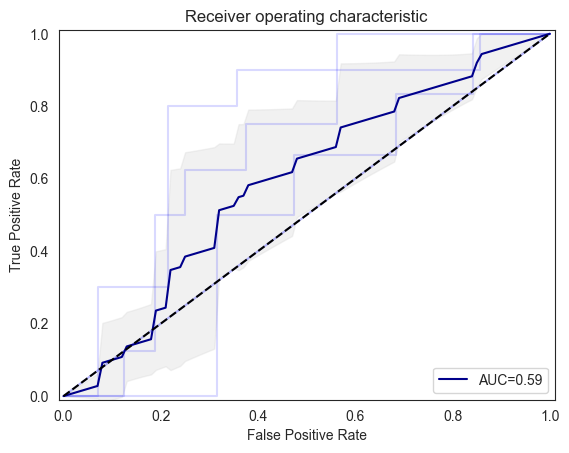

In [7]:
for gse_acc in list(CV_results.keys()):
    print(gse_acc)
    try:
        mc.plot_cv_roc(CV_results[gse_acc])
    except:
        print ("Cant plot ROC curve for %s (test sets don't include both labels)"%gse_acc)

GSE42861


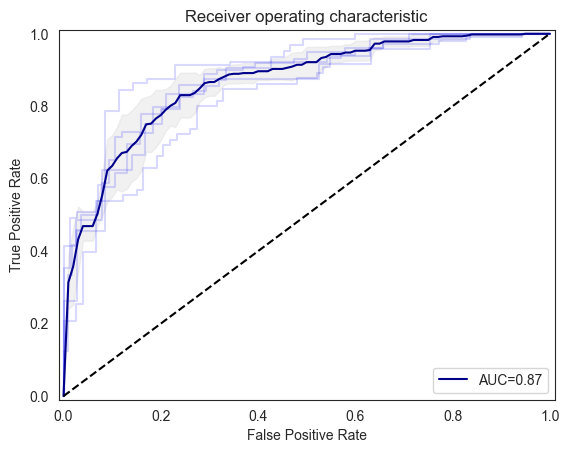

GSE111942


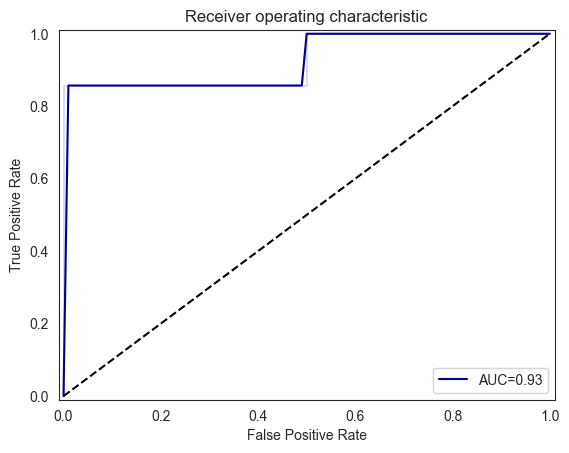

GSE121192


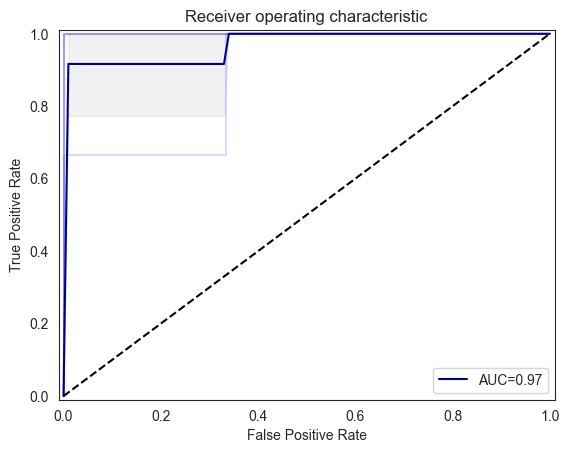

GSE87095


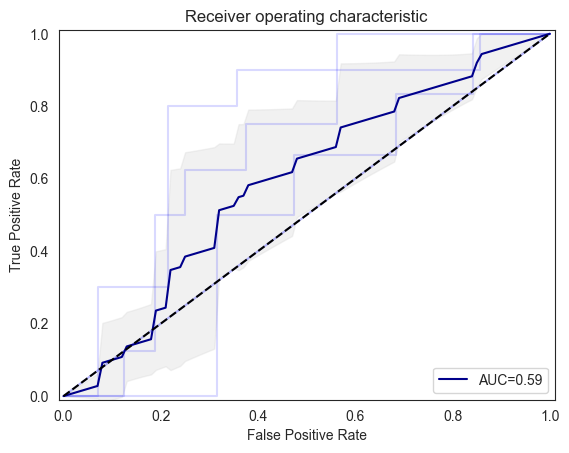

In [9]:
for gse_acc in list(CV_results.keys()):
    print(gse_acc)
    try:
        mc.plot_cv_roc(CV_results[gse_acc])
    except:
        print ("Cant plot ROC curve for %s (test sets don't include both labels)"%gse_acc)

In [8]:
cv_res = CV_results["GSE42861"]

In [ ]:
cv_res[

GSE42861
              precision    recall  f1-score   support

         0.0       0.55      0.45      0.50       335
         1.0       0.56      0.65      0.60       354

    accuracy                           0.56       689
   macro avg       0.56      0.55      0.55       689
weighted avg       0.56      0.56      0.55       689



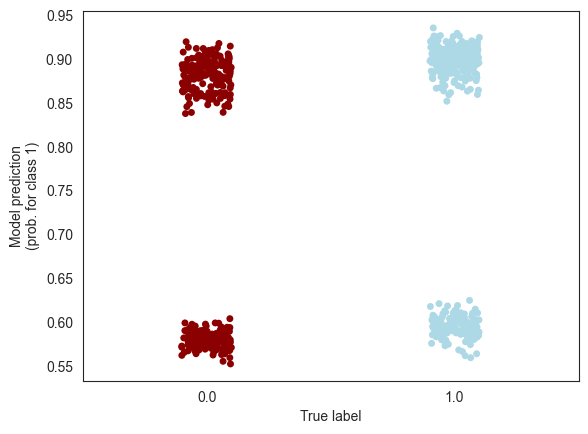

******************************************************

GSE111942
              precision    recall  f1-score   support

         0.0       0.29      0.56      0.38        18
         1.0       0.00      0.00      0.00        25

    accuracy                           0.23        43
   macro avg       0.14      0.28      0.19        43
weighted avg       0.12      0.23      0.16        43



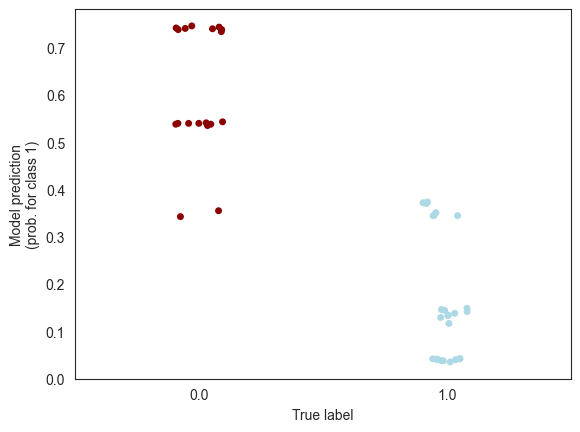

******************************************************

GSE121192
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        16
         1.0       0.65      1.00      0.79        30

    accuracy                           0.65        46
   macro avg       0.33      0.50      0.39        46
weighted avg       0.43      0.65      0.51        46



/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

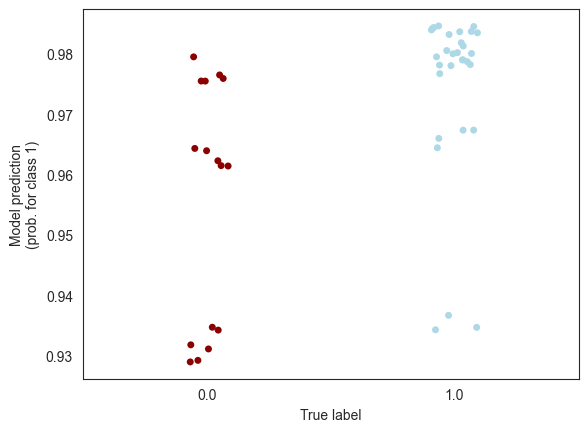

******************************************************

GSE87095
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75        73
         1.0       0.00      0.00      0.00        49

    accuracy                           0.60       122
   macro avg       0.30      0.50      0.37       122
weighted avg       0.36      0.60      0.45       122



/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

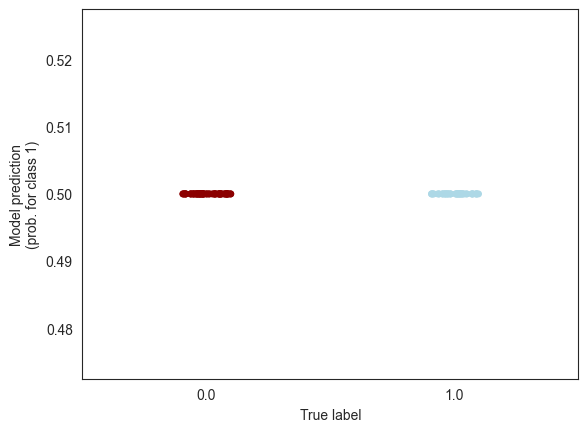

******************************************************



In [39]:
THRESH = 0.7
for gse_acc in list(CV_results.keys()):
    print(gse_acc)
    mc.print_report(cv_res=CV_results[gse_acc], THRESH=THRESH)
    mc.plot_pred_prob_by_labels(cv_res=CV_results[gse_acc])
    print("******************************************************\n")

In [17]:
gse_acc = "GSE42861" #"GSE175364"#"GSE111223"#
gse_d = os.path.join(data_d, gse_acc)

data = mc.Dataset(gse_d=gse_d)
data.load_data()#max_CpGs=500, max_samps=50) 
data.organize_data()

data.groups.value_counts()

Target label counts (0/1): 335 / 354


Group  
case       354
control    335
Name: count, dtype: int64

In [18]:
df = data.df

In [19]:
df.shape

(689, 486427)

In [20]:
df = df.dropna(how="all", axis=1)

In [21]:
df.shape

(689, 421560)

In [ ]:
%%time
imp_vals = mc.feature_imputation_values(df, nan_policy="zeros")

In [ ]:
imp_vals.head()

In [23]:
%%time
imp_vals = mc.feature_imputation_values(df, nan_policy='impute_by_median')

CPU times: user 7.2 s, sys: 295 ms, total: 7.49 s
Wall time: 7.49 s


In [27]:
from numba import njit


In [28]:
def fillna_npwhere_njit(array, values):
    """ Speed-optimized df.fillna() function (solution taken from https://www.kaggle.com/code/gogo827jz/optimise-speed-of-filling-nan-function)"""
    if np.isnan(array.sum()):
        array = np.where(np.isnan(array), values, array)
    return array

In [ ]:
def numba_fillna(array, values):
    """ Speed-optimized df.fillna() function (solution taken from https://www.kaggle.com/code/gogo827jz/optimise-speed-of-filling-nan-function)"""
    if np.isnan(array.sum()):
        array = np.where(np.isnan(array), values, array)
    return array

In [33]:
%%time
df1 = pd.DataFrame(data=numba_fillna(df.values, imp_vals.values),
                  index=df.index, columns=df.columns)

CPU times: user 291 ms, sys: 191 ms, total: 482 ms
Wall time: 490 ms


In [34]:
df.head()

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
GSM1051525,0.686281,0.962046,0.905875,0.193567,0.817305,NaN,0.906231,0.260223,0.340059,0.016046,...,0.024458,0.427357,0.438267,0.019204,0.498311,0.041816,0.539630,0.971805,0.058699,0.944050
GSM1051526,0.584531,0.967548,0.888333,0.178298,0.818665,NaN,0.891455,0.278688,0.364477,0.016934,...,0.977473,0.416408,0.933439,0.019222,0.514895,0.504683,0.967514,0.510694,0.937656,0.949624
GSM1051527,0.592709,0.975919,0.919231,0.188164,0.834525,NaN,0.852248,0.257025,0.327229,0.013867,...,0.477089,0.440854,0.430473,0.980047,0.512881,0.504845,0.970910,0.080963,0.949168,0.954501
GSM1051528,0.577408,0.963163,0.926322,0.232448,0.831883,NaN,0.887470,0.247310,0.361641,0.014647,...,0.979112,0.429853,0.448298,0.505598,0.968937,0.523901,0.558666,0.971480,0.941798,0.660119
GSM1051529,0.640440,0.966132,0.917095,0.211572,0.866477,NaN,0.855370,0.263623,0.320598,0.015495,...,0.475986,0.418893,0.059563,0.021861,0.021292,0.966994,0.533191,0.523817,0.936594,0.942595


In [35]:
df1.head()

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
GSM1051525,0.686281,0.962046,0.905875,0.193567,0.817305,0.775707,0.906231,0.260223,0.340059,0.016046,...,0.024458,0.427357,0.438267,0.019204,0.498311,0.041816,0.539630,0.971805,0.058699,0.944050
GSM1051526,0.584531,0.967548,0.888333,0.178298,0.818665,0.775707,0.891455,0.278688,0.364477,0.016934,...,0.977473,0.416408,0.933439,0.019222,0.514895,0.504683,0.967514,0.510694,0.937656,0.949624
GSM1051527,0.592709,0.975919,0.919231,0.188164,0.834525,0.775707,0.852248,0.257025,0.327229,0.013867,...,0.477089,0.440854,0.430473,0.980047,0.512881,0.504845,0.970910,0.080963,0.949168,0.954501
GSM1051528,0.577408,0.963163,0.926322,0.232448,0.831883,0.775707,0.887470,0.247310,0.361641,0.014647,...,0.979112,0.429853,0.448298,0.505598,0.968937,0.523901,0.558666,0.971480,0.941798,0.660119
GSM1051529,0.640440,0.966132,0.917095,0.211572,0.866477,0.775707,0.855370,0.263623,0.320598,0.015495,...,0.475986,0.418893,0.059563,0.021861,0.021292,0.966994,0.533191,0.523817,0.936594,0.942595


In [24]:
%%time
df = df.fillna(imp_vals)

KeyboardInterrupt: 

In [25]:
df.shape

(689, 421560)

In [26]:
df

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
GSM1051525,0.686281,0.962046,0.905875,0.193567,0.817305,NaN,0.906231,0.260223,0.340059,0.016046,...,0.024458,0.427357,0.438267,0.019204,0.498311,0.041816,0.539630,0.971805,0.058699,0.944050
GSM1051526,0.584531,0.967548,0.888333,0.178298,0.818665,NaN,0.891455,0.278688,0.364477,0.016934,...,0.977473,0.416408,0.933439,0.019222,0.514895,0.504683,0.967514,0.510694,0.937656,0.949624
GSM1051527,0.592709,0.975919,0.919231,0.188164,0.834525,NaN,0.852248,0.257025,0.327229,0.013867,...,0.477089,0.440854,0.430473,0.980047,0.512881,0.504845,0.970910,0.080963,0.949168,0.954501
GSM1051528,0.577408,0.963163,0.926322,0.232448,0.831883,NaN,0.887470,0.247310,0.361641,0.014647,...,0.979112,0.429853,0.448298,0.505598,0.968937,0.523901,0.558666,0.971480,0.941798,0.660119
GSM1051529,0.640440,0.966132,0.917095,0.211572,0.866477,NaN,0.855370,0.263623,0.320598,0.015495,...,0.475986,0.418893,0.059563,0.021861,0.021292,0.966994,0.533191,0.523817,0.936594,0.942595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1052209,0.592203,0.954109,0.904882,0.219661,0.827999,0.752372,0.891825,0.356841,0.367995,0.014949,...,0.032457,0.456806,0.933303,0.977614,0.502663,0.046552,0.553624,0.508093,0.614277,0.736908
GSM1052210,0.678658,0.667800,NaN,NaN,NaN,NaN,0.948284,0.307975,0.179352,0.015159,...,0.961334,0.979819,NaN,0.123634,0.967231,0.903874,0.950816,0.042149,NaN,NaN
GSM1052211,0.535610,0.963002,0.914095,0.154860,0.874325,0.791451,0.882077,0.272573,0.383886,0.019115,...,0.516712,0.451783,0.931258,0.555527,0.508514,0.042947,0.537339,0.524839,0.571093,0.726644
GSM1052212,0.492007,0.961565,0.893053,0.155948,0.848837,NaN,0.901595,0.293819,0.439254,0.016573,...,0.974069,0.978421,0.459357,0.979481,0.514862,0.962780,0.546528,0.514195,0.552083,0.772179
